# <span style="color:crimson;">Telco Customer Churn Prediction

**<span style="color:crimson;">Business Problem**
    
Churn prediction means detecting which customers are likely to leave a service or stop using a product. It is a critical prediction for many businesses because acquiring new clients often costs more than retaining existing ones.  
We need to know: “Is this customer going to leave us within X months?” Yes or No? It is a binary classification task.

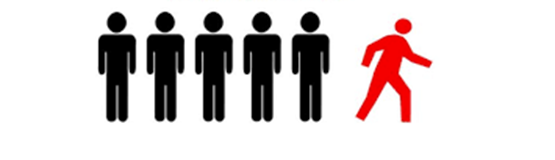
    
The data set includes information about:

* Customers who left within the last month – the column is called Churn 
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies 
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges 
* Demographic info about customers – gender, age range, and if they have partners and dependents
    
**<span style="color:crimson;">Task Details**
    
* [1. IMPORTING LIBRARIES AND DATA](#section-one)
* [2. EXPLORATORY DATA ANALYSIS](#section-two)
    * [2.1 General Picture](#sub_section-2.1)
    * [2.2 Categorical and Numerical Variable Analysis](#sub_section-2.2)
    * [2.3 Correlation](#sub_section-2.3)
    
 
* [3. FEATURE ENGINEERING & DATA PRE-PROCESSING](#section-three)
    * [3.1 Outliers](#sub_section-3.1)
    * [3.2 Missing Values](#sub_section-3.2)
    * [3.3 Encoding (Label Encoding, One-Hot Encoding)](#sub_section-3.3)
    * [3.4 Feature Extraction & Interactions](#sub_section-3.4)
      
    
* [4. MODEL & PREDICTION](#section-four)
    * [4.1 Base Model](#sub_section-4.1)
    * [4.2 Model with Feature Engineering](#sub_section-4.2)


 <a id="section-one"></a>
# <span style="color:crimson;">1. IMPORTING LIBRARIES AND DATA


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df=pd.read_csv(r"C:\Users\Workstation\PycharmProjects\VBO1\Hafta_6\Ödevler\Telco-Customer-Churn.csv ")

<a id="section-two"></a>
# <span style="color:crimson;"> 2. EXPLORATORY DATA ANALYSIS   

<a id="section-2.1"></a>
## <span style="color:crimson;">2.1 General Picture

In [2]:
df.shape

(7043, 21)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.650,6844.5,No


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The data type of the TotalCharges variable appears to be an object, but it must be a float type variable. To fix it we need to replace the ' ' values with 0.0.

In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [7]:
df['TotalCharges'].dtypes

dtype('float64')

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
   
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [10]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


In [11]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [12]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [13]:
cat_but_car

['customerID']

<a id="sub_section-2.1"></a>
## <span style="color:crimson;">2.2 Categorical and Numerical Variable Analysis

In [14]:
for col in cat_cols:
    print(pd.DataFrame({col: df[col].value_counts(),
                        "Ratio": 100 * df[col].value_counts() / len(df)}))
    print("##########################################")


        gender  Ratio
Male      3555 50.476
Female    3488 49.524
##########################################
     Partner  Ratio
No      3641 51.697
Yes     3402 48.303
##########################################
     Dependents  Ratio
No         4933 70.041
Yes        2110 29.959
##########################################
     PhoneService  Ratio
Yes          6361 90.317
No            682  9.683
##########################################
                  MultipleLines  Ratio
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
##########################################
             InternetService  Ratio
Fiber optic             3096 43.959
DSL                     2421 34.375
No                      1526 21.667
##########################################
                     OnlineSecurity  Ratio
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667


* About half of the customers in our dataset are men and the other half are women.
* About 50% of clients have a partner (married)
* Only 30% of total customers have dependents.
* 90% of customers receive telephone service.
* 53% of 90% of people who get phone service have more than one line
* There is a 21% segment that does not have an Internet service provider
* 63% of customers with an Internet service provider do not have online security
* 55% of customers with an Internet service provider do not have an online backup service
* 56% of customers with an Internet service provider do not have device protection
* 62% of customers with Internet service providers do not receive technical support
* 50% of customers with Internet service providers do not receive TV broadcasting service
* 50% of customers with Internet service providers do not receive movie streaming service
* Most of the customers are contracting month to month. There are close numbers of customers on 1-year and 2-year contracts.
* 60% of customers have paperless invoices
* About 26% of customers left the platform in the last month
* 16% of the dataset consists of older customers So most of the customers in the data are young

count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


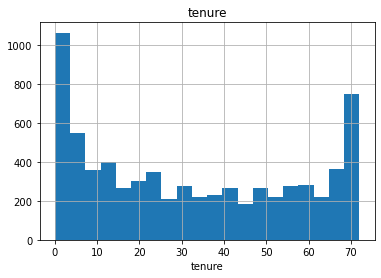

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


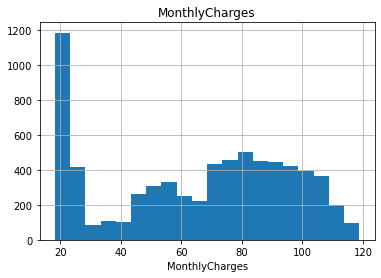

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


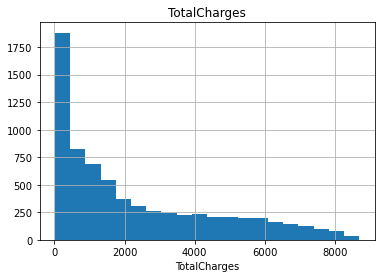

In [15]:
for col in num_cols:
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(df[col].describe(quantiles).T)
    df[col].hist(bins=20)
    plt.xlabel(col)
    plt.title(col)
    plt.show()

Looking at tenure, we see that 1-month customers are too many, followed by 70-month customers.

It may have happened due to different contracts, let's look at the tenure of people with a monthly contract and the tenure of people with a 2-year contract.

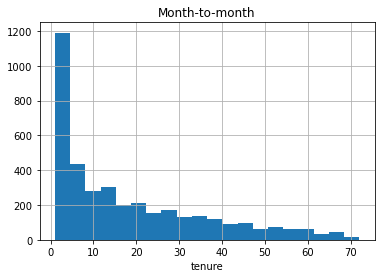

In [16]:
df[df["Contract"] == "Month-to-month"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Month-to-month")
plt.show()

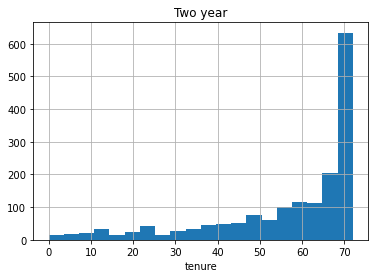

In [17]:
df[df["Contract"] == "Two year"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Two year")
plt.show()

In [18]:
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

In [19]:
for col in cat_cols:
    print(col)
    print(pd.DataFrame({"TARGET_MEAN": df.groupby(col)['Churn'].mean(),
                        "Count": df[col].value_counts(),
                        "Ratio": 100 * df[col].value_counts() / len(df)}), end="\n\n\n")

gender
        TARGET_MEAN  Count  Ratio
Female        0.269   3488 49.524
Male          0.262   3555 50.476


Partner
     TARGET_MEAN  Count  Ratio
No         0.330   3641 51.697
Yes        0.197   3402 48.303


Dependents
     TARGET_MEAN  Count  Ratio
No         0.313   4933 70.041
Yes        0.155   2110 29.959


PhoneService
     TARGET_MEAN  Count  Ratio
No         0.249    682  9.683
Yes        0.267   6361 90.317


MultipleLines
                  TARGET_MEAN  Count  Ratio
No                      0.250   3390 48.133
No phone service        0.249    682  9.683
Yes                     0.286   2971 42.184


InternetService
             TARGET_MEAN  Count  Ratio
DSL                0.190   2421 34.375
Fiber optic        0.419   3096 43.959
No                 0.074   1526 21.667


OnlineSecurity
                     TARGET_MEAN  Count  Ratio
No                         0.418   3498 49.666
No internet service        0.074   1526 21.667
Yes                        0.146   2019 28.667


O

* The percentage of churn in men and women is almost equal
* Customers with partners and dependents have a lower churn rate
* No difference in PhoneService and MultipleLines
* Loss rate is much higher in Fiber Optic Internet Services
* High churn rate for customers without services such as No OnlineSecurity, OnlineBackup and TechSupport
* A larger percentage of Customers with a monthly subscription churn compared to Customers with a one- or two-year contract
* Those with paperless billing have a higher churn rate
* Customers with ElectronicCheck PaymentMethod tend to leave the platform more than other options
* Older customers have a higher percentage of churn

In [20]:
for col in num_cols:
    print(df.groupby('Churn').agg({col: "mean"}), end="\n\n\n")

       tenure
Churn        
0      37.570
1      17.979


       MonthlyCharges
Churn                
0              61.265
1              74.441


       TotalCharges
Churn              
0          2555.344
1          1531.796




* When we look at the Tenure and Churn relationship, we see that non-churn customers have been customers for longer
* When monthlycharges and Churn are examined, the average monthly payments of customers with churn are higher.

<a id="sub_section-2.3"></a>
## <span style="color:crimson;">2.3 Correlation

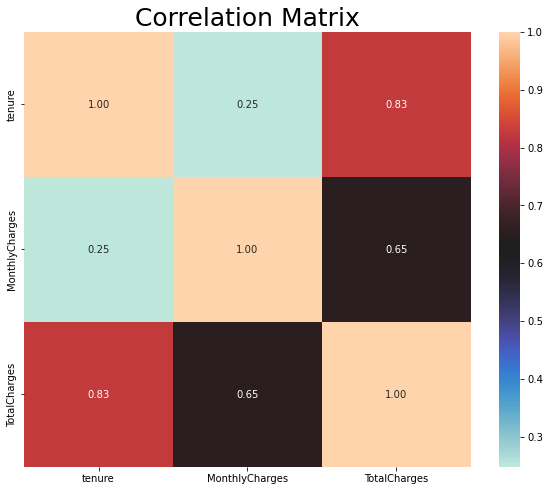

In [21]:
df[num_cols].corr()

# Korelasyon Matrisi
f, ax = plt.subplots(figsize=[10, 8])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="icefire")
ax.set_title("Correlation Matrix", fontsize=25)
plt.show()


TotalChargers appears to be highly correlated with MonthlyCharges and tenure

<a id="section-three"></a>
# <span style="color:crimson;"> 3. FEATURE ENGINEERING & DATA PREPROCESSING


  <a id="sub_section-3.1"></a>
## <span style="color:crimson;"> 3.1 Outliers

In [22]:
for col in num_cols:
    quartile1 = df[col].quantile(0.05)
    quartile3 = df[col].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    if df[(df[col] > up_limit) | (df[col] < low_limit)].any(axis=None):
        print(col)
    else:
        print('There is no outlier in',col)

There is no outlier in tenure
There is no outlier in MonthlyCharges
There is no outlier in TotalCharges


<a id="sub_section-3.2"></a>
## <span style="color:crimson;"> 3.2 Missing Values 

In [23]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
df["TotalCharges"].fillna(0, inplace=True)

In [25]:
df["TotalCharges"].isnull().sum()

0

We copy the dataframe to create the base model with the data before feature engineering

In [26]:
dff = df.copy()

<a id="sub_section-3.4"></a>
## <span style="color:crimson;"> 3.4 Feature Extraction & Interactions 

In [27]:
# Creating an annual categorical variable from the Tenure variable
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"

df["NEW_TENURE_YEAR"].value_counts()

# Specify 1 or 2 year contract customers as Engaged
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

# Customers who do not receive any support, backup or protection
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "No") or (x["DeviceProtection"] != "No") or (x["TechSupport"] != "No") else 0, axis=1)

# Customers with monthly contracts and young
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)


# Total number of services received by the person
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)


# Herhangi bir streaming hizmeti alan kişiler
df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

# Does the person make automatic payments?
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

# average monthly payment
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] +0.1)

# Current Price increase relative to average price
df["NEW_Increase"] = df["NEW_AVG_Charges"] / (df["MonthlyCharges"] + 1)

# Charge per service
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)


<a id="sub_section-3.3"></a>
## <span style="color:crimson;"> 3.3 Encoding (Label Encoding, One-Hot Encoding) 

### <span style="color:crimson;"> Label Encoding

In [28]:
dff.shape, df.shape

((7043, 21), (7043, 31))

In [29]:
binary_cols_base = [col for col in dff.columns if dff[col].dtypes == "O" and dff[col].nunique() == 2]
binary_cols_base

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [30]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [31]:
for col in binary_cols:
    labelencoder = LabelEncoder()
    df[col] = labelencoder.fit_transform(df[col])
    dff[col] = labelencoder.fit_transform(dff[col])

In [32]:
dff.shape, df.shape

((7043, 21), (7043, 31))

### <span style="color:crimson;"> One Hot Encoding

In [33]:
cat_cols = [col for col in cat_cols if col not in ["Churn"]]
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [34]:
# For base model
dff = pd.get_dummies(dff, columns=cat_cols, drop_first=True)

In [35]:
# For the model with feature engineering
# Update of cat_cols list
cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

Observations: 7043
Variables: 31
cat_cols: 24
num_cols: 6
cat_but_car: 1
num_but_cat: 13


['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'NEW_TENURE_YEAR',
 'SeniorCitizen',
 'NEW_Engaged',
 'NEW_noProt',
 'NEW_Young_Not_Engaged',
 'NEW_FLAG_ANY_STREAMING',
 'NEW_FLAG_AutoPayment']

In [36]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [37]:
dff.shape,df.shape

((7043, 32), (7043, 46))

In [38]:
df.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_TotalServices,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year,SeniorCitizen_1,NEW_Engaged_1,NEW_noProt_1,NEW_Young_Not_Engaged_1,NEW_FLAG_ANY_STREAMING_1,NEW_FLAG_AutoPayment_1
0,7590-VHVEG,0,1,0,1,0,1,29.850,29.850,0,1,27.136,0.880,14.925,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
1,5575-GNVDE,1,0,0,34,1,0,56.950,1889.500,0,3,55.411,0.956,14.238,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
2,3668-QPYBK,1,0,0,2,1,1,53.850,108.150,1,3,51.500,0.939,13.463,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,1,0,0,45,0,0,42.300,1840.750,0,3,40.815,0.943,10.575,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
4,9237-HQITU,0,0,0,2,1,1,70.700,151.650,1,1,72.214,1.007,35.350,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


<a id="section-four"></a>
# <span style="color:crimson;"> 4. MODEL & PREDICTION  


<a id="sub_section-4.1"></a>
## <span style="color:crimson;"> 4.1 Base Model

In [39]:
y_base = dff["Churn"]
X_base = dff.drop(["Churn","customerID"], axis=1)

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.30, random_state=17)

catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train_base, y_train_base)
y_pred_base = catboost_model.predict(X_test_base)


print(f"Accuracy: {round(accuracy_score(y_pred_base, y_test_base), 4)}")
print(f"Recall: {round(recall_score(y_pred_base,y_test_base),4)}")
print(f"Precision: {round(precision_score(y_pred_base,y_test_base), 4)}")
print(f"F1: {round(f1_score(y_pred_base,y_test_base), 4)}")
print(f"Auc: {round(roc_auc_score(y_pred_base,y_test_base), 4)}")


Accuracy: 0.7922
Recall: 0.6517
Precision: 0.5052
F1: 0.5692
Auc: 0.7407


<a id="sub_section-4.2"></a>
## <span style="color:crimson;"> 4.2 Model with Feature Engineering

In [40]:
y = df["Churn"]
X = df.drop(["Churn","customerID"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 3)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")


Accuracy: 0.796
Recall: 0.66
Precision: 0.51
F1: 0.58
Auc: 0.75


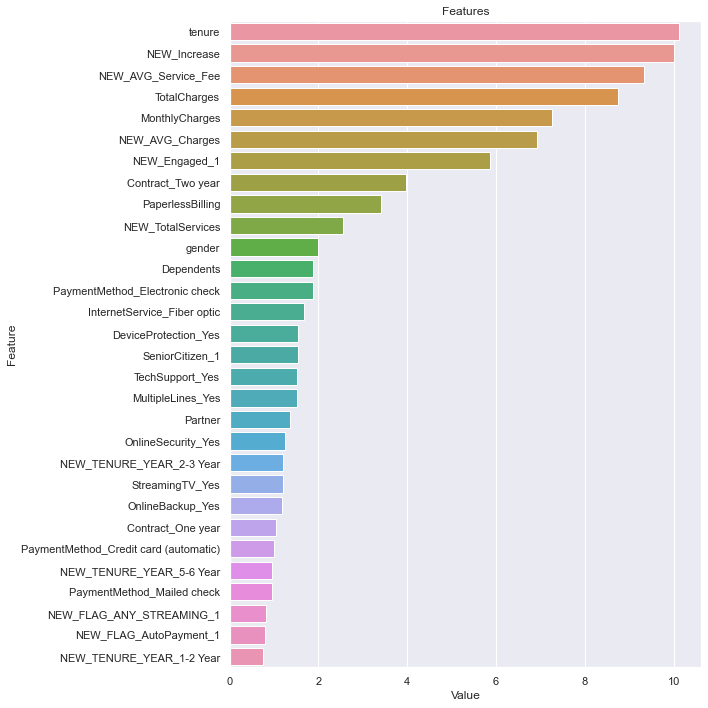

In [42]:
feature_imp = pd.DataFrame({'Value': catboost_model.feature_importances_, 'Feature': X_train.columns})
plt.figure(figsize=(10, 10))
sns.set(font_scale=1)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:30])
plt.title('Features')
plt.tight_layout()
plt.show()


As can be clearly seen, the f1 score has improved with Feature engineering and five of the newly created features are in the top 10 in feature importance ranking.